In [ ]:
# Standard Data Science Imports
import numpy as np
import pandas as pd
from pandas import DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
import sklearn
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

# Loading the data set into Pandas dataframe
df = pd.read_csv('/Users/Spence604/Library/CloudStorage/OneDrive-WesternGovernorsUniversity/Docs/Churn Data/churn_clean.csv')

In [ ]:
# Examining fist five records of dataset
df.head()

In [ ]:
# Viewing DataFrame descriptive information
df.info

In [ ]:
# Getting an overview of descriptive stats
df.describe()

In [ ]:
#dupe and null check

Is_dups_bool = df.duplicated()
print("Are there any duplicates? " + str(Is_dups_bool.value_counts()))

nan_values = df.isnull()
nan_columns = nan_values.any()
columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

In [ ]:
df['Techie'] = df['Techie'].map(
                   {'Yes':1 ,'No':0})

df['Tablet'] = df['Tablet'].map(
                   {'Yes':1 ,'No':0})

df['Gender'] = df['Gender'].map(
                   {'Male':1 ,'Female':2 , 'Nonbinary': 0})


In [ ]:
# subset the dataframe to relevant variables
df = df[['Tenure','Age','Contacts','Income','Bandwidth_GB_Year', 'Yearly_equip_failure', 'Tablet', 'Gender', 'Techie']]

In [ ]:
df.head()

In [ ]:
# export cleaned data to csv
df.to_csv('D209 Assesment.csv')


# ANALYSIS

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
train.to_csv('Train Assesment.csv')

In [ ]:
test.to_csv('Test Assement.csv')


In [ ]:
# Feature Selection
X = df.drop('Techie', axis=1).values
y = df['Techie']

# Data split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.02, random_state=21)


In [38]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=6)

In [39]:
# Prediction
y_pred = knn.predict(X_test)


In [40]:
# Accuracy Score of the training set
knn.score(X_test, y_test)

0.815

In [41]:
# Setup hyperparameters selection for the KNN
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # K-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

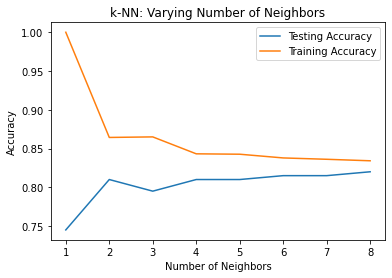

In [42]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [43]:
# Compute classification metrics after scaling
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.99      0.90       163
           1       0.50      0.03      0.05        37

    accuracy                           0.81       200
   macro avg       0.66      0.51      0.47       200
weighted avg       0.76      0.81      0.74       200



In [44]:
# Import sklearn confusion_matrix & generate results
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)


[[162   1]
 [ 36   1]]


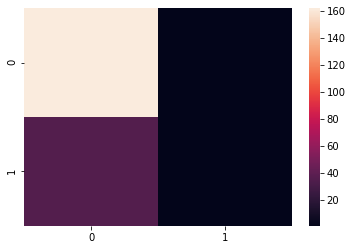

In [45]:
ax1 = sns.heatmap(matrix)
plt.show()

In [34]:
# Re-insatiate the classifier with an ideal value of 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Prediction
y_pred = knn.predict(X_test)

# Accuracy Score
knn.score(X_test, y_test)

0.81

# pt v

In [ ]:
#1

In [46]:
# Import ROC AUC  
from sklearn.metrics import roc_auc_score

# Fit the data
knn.fit(X, y)

# Predicted probabilities
y_predicted_probabilities = knn.predict_proba(X_test)[:,1]

# AUC score
print("The Area under curve (AUC) is: {:.4f}".format(roc_auc_score(y_test, y_predicted_probabilities)))

The Area under curve (AUC) is: 0.8106


Discuss the results and implications of your classification analysis.
The AUC score informs us how well is our model at predicting the correct label for 'Churn’. The value is scaled from 0 to 1 being the most accurate. This KNN model has a score of '0.8753' which means the model is adequate at predicting the Churn rate but could perform better if further analysis is performed on the independent variables.

Discuss one limitation of your data analysis.
Starting with an arbitrary choice of k = 6 nearest neighbours will yield dramatically different results. As shown above that a consideration must be observed and a systematic approach of trial and test must be tried to increase the accuracy of the prediction. I have also noticed that limiting the number of the independent variable to a select few can improve the performance considerably and reduce the memory and computational load which could lead to slow performance.

Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.
The predictor variables create a low accuracy score of ‘0.89’. The stakeholders need to further invest in market analysis to identify competitive services and the marketing team needs to come up with products and services that will create an eco-system for the customer which will decrease the churn rate.



In [ ]:
print('Variable and DataType')
types = pd.DataFrame(['numeric' if df[i].dtypes == (int or float) 
                      else 'categorical' for i in df.columns], df.columns, columns=['DataType'])
types